# 連続型確率変数
- 連続型確率変数はとりうる値が連続的になる。
- 計算過程で積分が含まれるなど離散型に比べ少し数式がややこしくなるが離散型と連続型に本質的な違いはない

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.optimize import minimize_scalar

%precision 3

'%.3f'

In [2]:
# 積分を SciPy の integral module を使って実装する
from scipy import integrate

# 結果に問題はないものの warning が出る処理が含まれるため抑制する
import warnings

# 積分に関する warning を出力しないようにする
warnings.filterwarnings('ignore', category=integrate.IntegrationWarning)

## １次元の連続型確率変数
連続型確率変数では、ある値をとるときの確率を定義する方法では、いずれも確率が０になりうまくいかない。そのため連続型確率変数では確率変数がある区間に入る確率を定義する。

### １次元の連続型確率変数の定義
- 連続型確率変数では、とりうる値は区間 \[a, b] で定義される
- 確率は **確率密度関数**または、単に **密度関数** と呼ばれる f(x) によって定義される

#### 確率密度関数（PDF: Probability Density Function）
- 確率は、区間に入る確率で定義される
- 積分で計算される

いかさま Roulette を例にして Python で実装していく

In [3]:
# とりうる値の下限と上限を x_range として定義
x_range = np.array([0, 1])

In [4]:
# x_range を定義域とする密度関数(PDF)を実装
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [5]:
# x_range と f の Set が確率分布。=> 確率変数 X の振る舞いがきまる。
# X は range と f を要素にもつ list として実装する
X = [x_range, f]

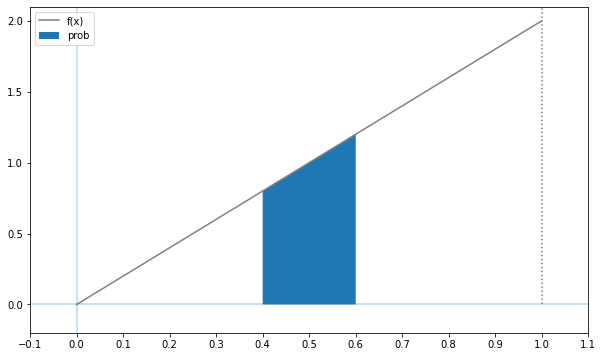

In [6]:
# 密度関数（PDF）を図示する
# # f(x) と x軸、２直線 x=0.4, x=0.6 に囲まれた領域を塗りつぶす。
# # 塗りつぶされた領域が、いかさま Roulette が0.4~0.6の間の値をとる確率になる
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4 から 0.6 の x座標を用意
xs = np.linspace(0.4, 0.6, 100)
# xs の範囲で f(x) と x軸に囲まれた領域を塗りつぶす
ax.fill_between(xs, [f(x) for x in xs], label='prob')
ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [7]:
# 第１引数が被積分関数、第２引数と第３引数が積分区間
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

１つめの値が積分地で、確率は 0.2 と確認できる

#### 確率の性質
`scipy.optimize` の `minimize_scaler()` を利用して f(x) の最小値が０以上なことを確認し、f(x)が常に０以上の値をとる、という性質を示す。

In [9]:
res = minimize_scalar(f)
# 関数の最小値は fun という Instance 変数に
res.fun

0

NumPy の `np.inf` を利用して積分計算を行い f(x) を -∞ から ∞ の区間で積分した結果が１になること確かめる

In [10]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

f(x) が 2x となっていたのは、この積分結果を１にするためである。

#### 累積分布関数（CDF: Cumulative Distribution Function）

In [11]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [13]:
# P(0.4 <= X <= 0.6) = F(0.6) - F(0.4)
F(0.6) - F(0.4)

0.200

分布関数 F(x) を図示してみる。分布関数は必ず単調増加関数になる。
※ 単調増加関数: x が増えたときに y が減少することのない関数のこと

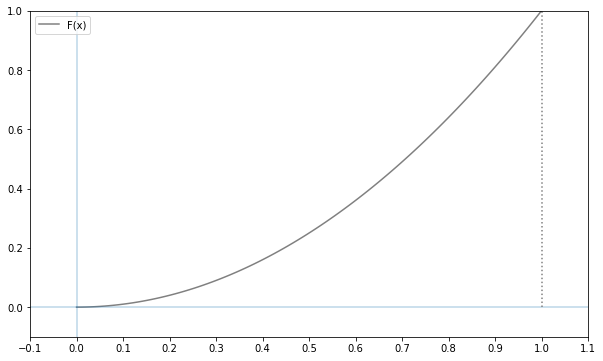

In [17]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', colors='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1,1)
ax.legend()

plt.show()

#### 確率変数の変換

In [18]:
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0

def G(y):
    return integrate.quad(g, -np.inf, y)[0]

密度関数 g(y) と分布関数 G(y) を同時に図示してみる

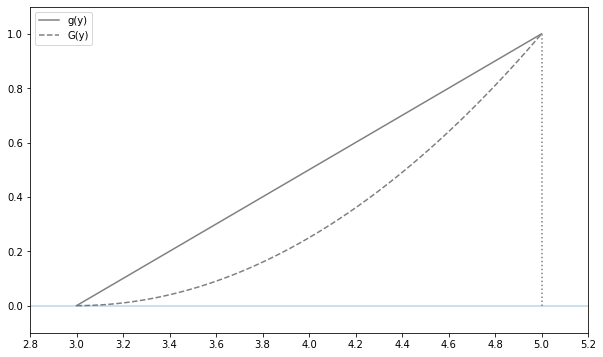

In [21]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys], label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys], label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

定義域こそ違うが、確率変数 X の密度関数と分布関数に似た形となっている。

### １次元の連続型確率分布の指標

#### 期待値

In [23]:
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [24]:
# 期待値の関数として実装しておく
def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [25]:
# 確率変数 X の期待値
E(X)

0.667

In [27]:
# 確率変数 Y = 2X + 3 の期待値
E(X, g=lambda x: 2 * x + 3)

4.333

連続型確率変数の場合でも、期待値の線形性が成立する

In [28]:
# E(2X+3) == 2E(X)+3 を確認する
2 * E(X) + 3

4.333

#### 分散

In [29]:
mean = E(X)
def integrand(x):
    return (x - mean) **2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [30]:
# 連続型確率変数の分散を実装してみる
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)

    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)

    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [31]:
V(X)

0.056

In [32]:
V(X, lambda x: 2*x + 3)

0.222

In [33]:
# 分散の公式が成立することを確認とる
# V(2X + 3) == 2**2V(X)
2**2 * V(X)

0.222